## Step 01 - Create SparkContext and SparkSession 

In the step below, Spark context and the spark session using the spark context has been created. Assigned all the resoures (cores) available to the spark conetxt for computation

In [1]:
# Step 01 - Create SparkContext and SparkSession and 

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()

if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assigment1_PartA")

spark = SparkSession(sparkContext=sc)

## Step 02 - Import file and make RDD's - Book1 & Book2

Reading the data scource (.txt) into a RDD using Spark Context created in the Step Above

Once the .txt files are imported into SPARK, the number of lines the files are being printed using the count function.

In [2]:
# Step 02 - Import file and make RDD's - Book1 & Book2

Book1_rdd = sc.textFile("Agile Processes  in Software Engineering  and Extreme Programming.txt")
Book2_rdd = sc.textFile("Scrum Handbook.txt")

print("Number of Line in Book 1 =", Book1_rdd.count())
print("Number of lines in Book 2 =", Book2_rdd.count())

Number of Line in Book 1 = 21569
Number of lines in Book 2 = 4617


## Step 03 - Cleaning/Manipulating text

Importing re (regex) to transform the RDD i.e. Removing Non-Alphabetical Characters, and leading & trailing Spaces

Once that is done, The RDD content is converted to lower case and the white spaces have been removed.

In [3]:
# Step 03 - Part 1, 2 & 3

import re
    
def transformRDD(lines):
    lines = re.sub("[^a-zA-Z\s]","",lines)
    lines = lines.lower()
    lines = lines.strip()
    return lines

Book1_clean_rdd = Book1_rdd.map(transformRDD)
Book2_clean_rdd = Book2_rdd.map(transformRDD)

print(Book1_clean_rdd.take(10))
print(Book2_clean_rdd.take(10)) 

['lnbip', '', '', 'i helen sharp', '', 'tracy hall eds', '', 'agile processes', 'in software engineering', 'and extreme programming']
['jeff sutherlands', '', 'scrum handbook', '', '', '', '', 'everything', 'you need', 'to know']


## Step 04 - Transforming the data/Counting the word

Using FlatMap on the RDD to split it into individual words for Book1.

Removing empty lines in Book 1.

Making a Pair RDD to count the number of words and their occurances for Book 1

In [4]:
# Step 04 - Counting the words and their occurances Book 1
wordCount_Book1 = Book1_clean_rdd.flatMap(lambda x: x.split(" "))
Rmove_space_Book1 = wordCount_Book1.filter(lambda x : x is not '')
Book1_word_rdd = Rmove_space_Book1.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending = False)
Book1_word_rdd.take(20)

[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

Using FlatMap on the RDD to split it into individual words for Book .

Removing empty lines in Book 2.

Making a Pair RDD to count the number of words and their occurances for Book 2

In [5]:
# Step 04 - Counting the words and their occurances Book 1

wordCount_Book2 = Book2_clean_rdd.flatMap(lambda x: x.split(" "))
Rmove_space_Book2 = wordCount_Book2.filter(lambda x : x is not '')
Book2_word_rdd = Rmove_space_Book2.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending = False)
Book2_word_rdd.take(20)

[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

<b> Importing nltk library to remove Stopwords from Book 1 and Book 2 </b>

In [6]:
# Import nltk stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 05 - Removing Stop Words

Removing Stop Words in Book 1 and then counting the frequency of words after removing stop words.
    
Also taking top 15 words and Occurances from Book 1 to Plot the Comparison Plot for Step 07

Displaying the number of words in Book 1 after removing the stop words
    

In [7]:
# step 05 - remove Stopwords Book1
stop_words = set(stopwords.words('english'))       
Book1_sw_rdd = Rmove_space_Book1.filter(lambda x : x not in stop_words)
Word_frequency_Book1 = Book1_sw_rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending = False)
Word_frequency_Book1.take(20)
book1_words = Word_frequency_Book1.map(lambda x: x[0]).take(15)
book1_occur = Word_frequency_Book1.map(lambda x: x[1]).take(15)
Total_words_Book1 = Word_frequency_Book1.values().sum()
Total_words_Book1

79056

Removing Stop Words in Book 2 and then counting the frequency of words after removing stop words.
    
Also taking top 15 words and Occurances from Book 2 to Plot the Comparison Plot for Step 07

Displaying the number of words in Book 2 after removing the stop words
    

In [8]:
# step 05 - remove Stopwords Book2
stop_words = set(stopwords.words('english'))       
Book2_sw_rdd = Rmove_space_Book2.filter(lambda x : x not in stop_words)
Word_frequency_Book2 = Book2_sw_rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending = False)
Word_frequency_Book2.take(20)
book2_words = Word_frequency_Book2.map(lambda x: x[0]).take(15)
book2_occur = Word_frequency_Book2.map(lambda x: x[1]).take(15)
Total_words_Book2 = Word_frequency_Book2.values().sum()
Total_words_Book2

10810

Finding the Total numbers of distinct Words in Book 1 using the distint() function

In [10]:
# Step 05 - Distinct Words - Book1
ttl_distinct_count_book1 = Word_frequency_Book1.distinct().count()
print(ttl_distinct_count_book1)

9611


Finding the Total numbers of distinct Words in Book 2 using the distint() function

In [11]:
# Step 05 - Distinct Words - Book2
ttl_distinct_count_book2 = Word_frequency_Book2.distinct().count()
print(ttl_distinct_count_book2)

2936


## Step 06 - Find the average occurrences of a word

Finding the Average occurance of words in book 1 by diving the total number of words by the total number of distinct words after cleaning the rdd

In [12]:
# Step 06 - Average Occurance - Book1
word_average_Book1 = Total_words_Book1/ttl_distinct_count_book1
round(word_average_Book1,3)

8.226

Finding the Average occurance of words in book 2 by diving the total number of words by the total number of distinct words after cleaning the rdd

In [15]:
# Step 06 - Average Occurance - Book2
word_average_Book2 = Total_words_Book2/ttl_distinct_count_book2
round(word_average_Book2,3)

3.682

## Step 07 - Exploratory data analysis

Importing math library to compute log fo a give number.

Computing the log of term frequency to plot the distribution of words in logrimithmic scale for Book 1.

After computing the the log(frequency of words) making a list of words and list of corresponding the log vales for the plot for Book 1



In [16]:
import math
Average_words_log_Book1 = Word_frequency_Book1.mapValues(lambda x : round(math.log(x)/math.log(10),4))
Average_words_log_Book1.collect()
Average_words_log_Book1 = Average_words_log_Book1.filter(lambda x: x[1] != 0)
Book1_word_list = Average_words_log_Book1.map(lambda x: x[0]).collect()
Book1_word_top15 = Average_words_log_Book1.map(lambda x: x[0]).take(15)
Book1_logValues = Average_words_log_Book1.map(lambda x: x[1]).collect()
Book1_top15_logValues = Average_words_log_Book1.map(lambda x: x[1]).take(15)
Book1_top15_logValues.sort(reverse = False)

Importing math library to compute log fo a give number.

Computing the log of term frequency to plot the distribution of words in logrimithmic scale for Book 2.

After computing the the log(frequency of words) making a list of words and list of corresponding the log vales for the plot for Book 2.

In [17]:
Average_words_log_Book2 = Word_frequency_Book2.mapValues(lambda x : round(math.log(x)/math.log(10),4))
Average_words_log_Book2.collect()
Average_words_log_Book2 = Average_words_log_Book2.filter(lambda x: x[1] != 0)
Book2_word_list = Average_words_log_Book2.map(lambda x: x[0]).collect()
Book2_word_top15 = Average_words_log_Book2.map(lambda x: x[0]).take(15)
Book2_logValues = Average_words_log_Book2.map(lambda x: x[1]).collect()
Book2_top15_logValues = Average_words_log_Book2.map(lambda x: x[1]).take(15)
Book2_top15_logValues.sort(reverse = False)

Importing Matplotlib and numpy to plot the graphs

In [18]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Step - 07 Part A
Writing a common function to plot the distribution of words in Book 1 and Book 2. The Function accepts a list of log values and the number of bins to plot the distribution usogn a histogram plot

In [19]:
def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.figure(figsize=(10,5))
  plt.hist(x, bins=logbins, color='seagreen')
  plt.xscale('log')
  #plt.figure(figsize=(20,10))
  plt.title('Words Distribution')
  plt.xlabel('Log Values')
  plt.ylabel('Word Count')
  #plt.figure(figsize=(20,10))

Plotting the distribution of words in Book 1 in a histogram.

The Distribution is Skewed to the left which means there are a lot of words with less number of occurrences.
The Distribution of words in Book 1 in not as flat as the distribution of words in book 2 because the number of words in Book 1 is more that Book 2

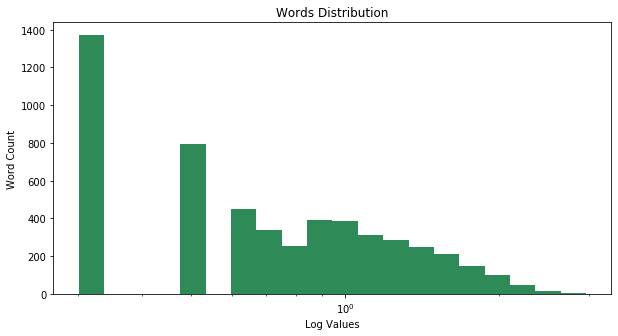

In [20]:
plot_loghist(Book1_logValues, 20)

Plotting the distribution of words in Book 2 in a histogram.

The Distribution is Skewed to the left which means there are a lot of words with less number of occurrences.
The Distribution of words in Book 2 is flatter than the distribution of words in book 1 because the number of words in Book 1 is more that Book 2

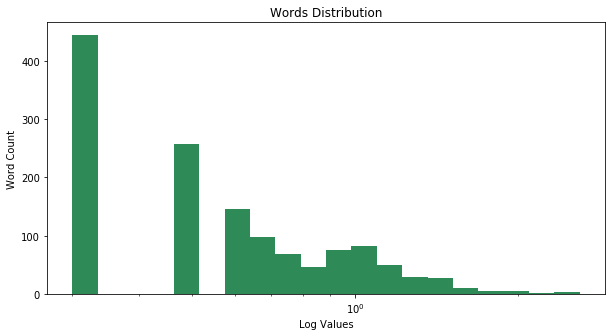

In [21]:
plot_loghist(Book2_logValues, 20)

### Step - 07 Part B - Comparing the occurrences of top 15 words in both the books

Wrote a function to plot the occurrences of words in both the books with accepts list of words and the list of the value of occurrences as parameters for the function

In [28]:
def plot_top15(b_W, b_V,v):
    objects_y_1 = b_V
    objects_x_1 = b_W
    y_pos_1 = np.arange(len(objects_y_1))
    x_pos_1 = np.arange(len(objects_x_1)) 
    y_axis_1 = b_V
    x_axis_1 = b_W
    plt.figure(figsize=(10,5))
    plt.bar(x_axis_1, y_axis_1, align='center', color='darkcyan')
    plt.xticks(x_pos_1, objects_x_1, rotation = 75)
    #plt.yticks(objects_y_1 )
    plt.xlabel('Words')
    plt.ylabel('occurance of words (n)')
    plt.title('Plotting the log of Average Occurance of each Word in '+v)
    plt.style.use('seaborn-whitegrid')
    for i, v in enumerate(y_axis_1):
        plt.text(y_pos_1[i] - 0.3, v + 0.1, str(v))
    plt.show()

Plotting the Occurrences of top 15 words in Book 1 using a Bar Plot

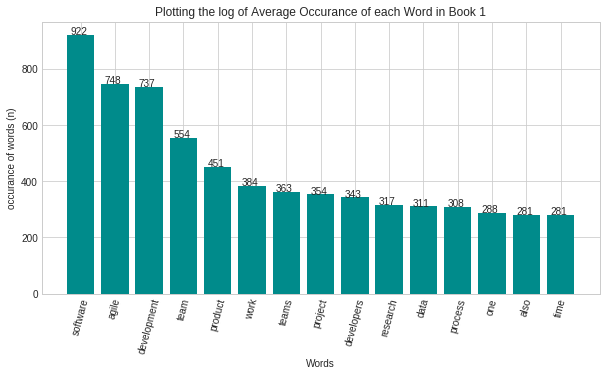

In [29]:
plot_top15(book1_words, book1_occur,'Book 1')

Plotting the Occurrences of top 15 words in Book 2 using Bar Plot

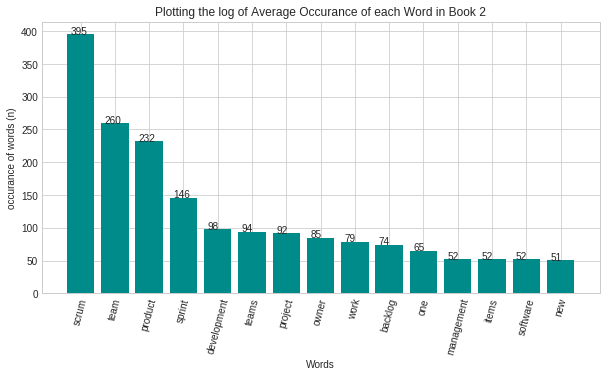

In [30]:
plot_top15(book2_words, book2_occur,'Book 2')

plotting the comparison of top 15 words in both book using the list with the value of occurrences (created in previous steps) of top 15 words in both the words. The code here plots a side-by-side Bar char to compare the occurrences of top 15 words.

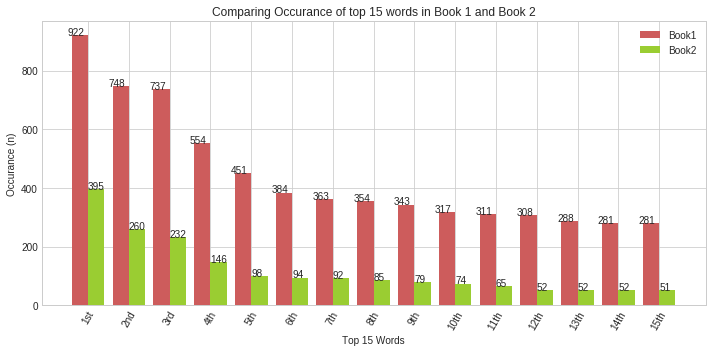

In [32]:
Book1 = book1_occur
Book2 = book2_occur
y_pos = np.arange(len(Book1))
# plot
bar_width = 0.4
plt.figure(figsize=(10,5))
plt.bar(y_pos, Book1, bar_width, align='center', color='indianred', label='Book1')
plt.bar(y_pos + bar_width, Book2, bar_width, align='center', color='yellowgreen', label='Book2')
plt.xticks(y_pos + 0.5 * bar_width, ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11th','12th','13th','14th','15th'], rotation = 60)
plt.xlabel('Top 15 Words')
plt.ylabel('Occurance (n)')
plt.legend(loc='upper right')
plt.title('Comparing Occurance of top 15 words in Book 1 and Book 2')
plt.tight_layout()
for i, v in enumerate(Book1):
    plt.text(y_pos[i] - 0.3, v + 0.1, str(v))
for i, v in enumerate(Book2):
    plt.text(y_pos[i]+0.5 - 0.3, v + 0.1, str(v))
plt.show()

The Occurences of top 15 words in Book 2 inless than Book 1 which is primarily beacause the numebr of lines in book 1 which allows the top 15 words to repeat often